### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

To start this investigation, let's obtain general info about the data frame columns and their contents:

In [4]:
# General data frame info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

From data.info() and by comparing the number of non-null values listed we can see there are several columns with null entries

Let's get additional insight into the number of missing or null values (NA, NaN) for those columns:

In [5]:
# Insights into number of missing or null values (NA, NaN)
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

We see the majority of nulls are found in the "car" column, followed by CoffeeHouse, Restaurant20Yo50, CarryAway, RestaurantLessThan20 and Bar
We will explore some of these entries more specifically later.

In the meantime les do some visual exporing of the dataframe and its columns:



In [6]:
# Set up number of visible rows and columns to appropriate numbers so it is possible to comfortably check data frame contents visually in Jupyter
print("Initial max_rows value is : " + 
      str(pd.options.display.max_rows)) 
print("Initial max_columns value is : " + 
      str(pd.options.display.max_columns)) 
pd.options.display.max_rows = 200
pd.options.display.max_columns = 26
print("New max_rows value is : " + 
      str(pd.options.display.max_rows)) 
print("New max_columns value is : " + 
      str(pd.options.display.max_columns)) 

Initial max_rows value is : 60
Initial max_columns value is : 20
New max_rows value is : 200
New max_columns value is : 26


In [7]:
# Do some visual perusing
data.head(20) #some other values were tried to visually inspect the data frame and get more familiarity with it
#data.tail(80) #some other values were tried to visually inspect the data frame and get more familiarity with it

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


We clearly see the NaNs in the 'car' column. What about the entries it has? Let's explore that:

In [8]:
# Lets check the entries in the 'car' column
data.query('~car.isna()')[['car']].value_counts().reset_index()

,car,count
0,Mazda5,22
1,Scooter and motorcycle,22
2,do not drive,22
3,Car that is too old to install Onstar :D,21
4,crossover,21


We see the entries are not that informative overall with the exception of the "do not drive" entries. Since the coupon program is targeting drivers only we should exclude those rows with people that do not drive. We'll do this in the next section

Let's inspect the entries in the other user attribute columns that have missing values in order to see if there are problems with those entries:

In [9]:
data.query('~Bar.isna()')[['Bar']].value_counts().reset_index()

,Bar,count
0,never,5197
1,less1,3482
2,1~3,2473
3,4~8,1076
4,gt8,349


In [10]:
data.query('~CoffeeHouse.isna()')[['CoffeeHouse']].value_counts().reset_index()

,CoffeeHouse,count
0,less1,3385
1,1~3,3225
2,never,2962
3,4~8,1784
4,gt8,1111


In [11]:
data.query('~CarryAway.isna()')[['CarryAway']].value_counts().reset_index()

,CarryAway,count
0,1~3,4672
1,4~8,4258
2,less1,1856
3,gt8,1594
4,never,153


In [12]:
data.query('~RestaurantLessThan20.isna()')[['RestaurantLessThan20']].value_counts().reset_index()

,RestaurantLessThan20,count
0,1~3,5376
1,4~8,3580
2,less1,2093
3,gt8,1285
4,never,220


In [13]:
data.query('~Restaurant20To50.isna()')[['Restaurant20To50']].value_counts().reset_index()

,Restaurant20To50,count
0,less1,6077
1,1~3,3290
2,never,2136
3,4~8,728
4,gt8,264


No problems with these entries. Nothing anomalous. 

3. Decide what to do about your missing data -- drop, replace, other...

I will focus on the Bar and CoffeeHouse columns for the analyses below. Therefore I will  cleanup the dataframe taking this fact into account

These are the cleanup actions I will take
- Exclude rows with "do not drive" answers in the "car" column 
- Delete the 'car' column as it is not informative for the analyses I have in mind
- Drop rows with NA/null entries in the Bar and coffeeHouse columns as the other user attribute columns with missing entries I will not use for this activity. Had that not be the case I would have dropped NA/null entries from those columns as well
  

In [14]:
# Exclude rows with 'do not drive' answers in 'car' column
data.query('car != "do not drive"', inplace = True)
# Delete car column
data.drop(['car'], axis=1, inplace = True)
# Drop rows with na entries in the Bar and CoffeeHouse columns
data.dropna(subset=['Bar', 'CoffeeHouse'], inplace = True)
# Check results
data.isna().sum()
#data.info()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                       0
CoffeeHouse               0
CarryAway               109
RestaurantLessThan20     88
Restaurant20To50        126
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [15]:
# We need to compute a percentage of 'yes' responses relative to the total number of observations
number_observations = len(data["Y"])
number_yes = len(data.query('Y == 1'))
proportion_accepted_percentage = 100*(number_yes/number_observations)
print(f'The proportion of the total observations that chose to accept the coupon was{proportion_accepted_percentage: 0.2f} percent.')

The proportion of the total observations that chose to accept the coupon was 57.06 percent.


5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

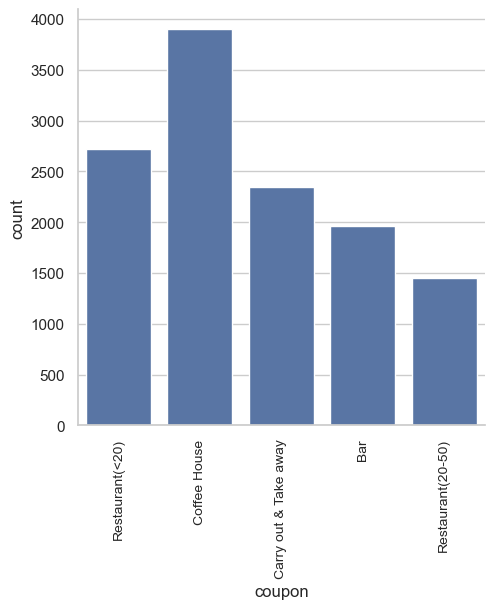

In [16]:
# Bar plot in Seaborn
#Use white grid
sns.set_theme(style="whitegrid")
#Generate bar plot 
sns.catplot(data=data, x="coupon", kind="count")
#Change size and rotate labels as they are long
plt.xticks(fontsize=10, rotation = 90)

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of temperature')

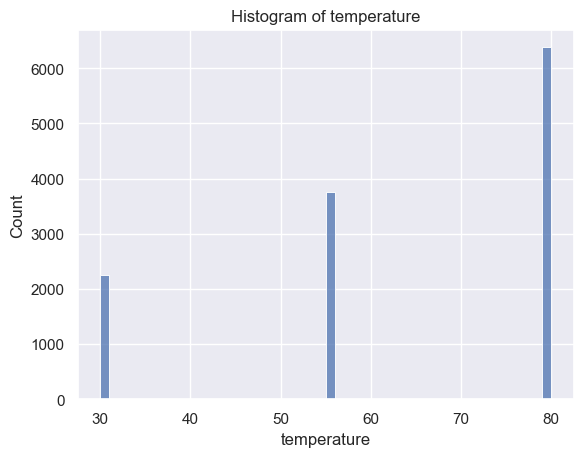

In [17]:
# Histogram plot in seaborn
#Use dark grid
sns.set_theme(style="darkgrid")
#Generate histogram plot of temperature column
sns.histplot(data=data, x="temperature", binwidth=1)
#Add title
plt.title('Histogram of temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
df_bar = data.query('coupon =="Bar"')

2. What proportion of bar coupons were accepted?


In [19]:
number_rows = len(df_bar)
number_yes = len(df_bar.query('Y == 1'))
number_no = len(df_bar.query('Y == 0'))
proportion_accepted_percentage = 100*(number_yes/number_rows)
print(f'The proportion of bar coupons that were accepted was {proportion_accepted_percentage: 0.2f} percent.')

The proportion of bar coupons that were accepted was  41.19 percent.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [20]:
df_went_to_bar_3_or_fewer_times = df_bar.query('Bar =="never" or Bar =="Less1" or Bar =="1~3"')
df_went_to_bar_3_or_fewer_times_acceptance_rate_percentage = 100*(len(df_went_to_bar_3_or_fewer_times.query('Y == 1'))/len(df_went_to_bar_3_or_fewer_times))

df_went_to_bar_more_than_3_times = df_bar.query('Bar =="4~8" or Bar =="gt8"')
df_went_to_bar_more_than_3_times_acceptance_rate_percentage = 100*(len(df_went_to_bar_more_than_3_times.query('Y == 1'))/len(df_went_to_bar_more_than_3_times))

bar_group_attendance_percentage_difference = df_went_to_bar_more_than_3_times_acceptance_rate_percentage - df_went_to_bar_3_or_fewer_times_acceptance_rate_percentage

print(f' The acceptance rate for individuals who went to a bar 3 or fewer times a month was{df_went_to_bar_3_or_fewer_times_acceptance_rate_percentage: 0.2f} percent.\n',
     f'The acceptance rate for individuals who went to a bar more than 3 times a month was{df_went_to_bar_more_than_3_times_acceptance_rate_percentage: 0.2f} percent.\n',
     f'The difference between the two groups was{bar_group_attendance_percentage_difference: 0.2f} percent.')

 The acceptance rate for individuals who went to a bar 3 or fewer times a month was 33.86 percent.
 The acceptance rate for individuals who went to a bar more than 3 times a month was 76.29 percent.
 The difference between the two groups was 42.43 percent.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [21]:
df_over25_went_to_bar_more_than_once_a_month = df_bar.query('(Bar =="1~3" or Bar =="4~8" or Bar =="gt8") and (age != "21" or age != "below21")')
df_over25_went_to_bar_more_than_once_a_month_acceptance_rate_percentage = 100*(len(df_over25_went_to_bar_more_than_once_a_month.query('Y == 1'))/len(df_over25_went_to_bar_more_than_once_a_month))

all_others = df_bar.query('(Bar =="never" or Bar =="less1") and (age == "21" or age == "below21")')
all_others_acceptance_rate_percentage = 100*(len(all_others.query('Y == 1'))/len(all_others))

bar_group_attendance_percentage_difference = df_over25_went_to_bar_more_than_once_a_month_acceptance_rate_percentage - all_others_acceptance_rate_percentage

print(f' The acceptance rate for individuals who went to a bar more than once a month and who were over the age of 25 was{df_over25_went_to_bar_more_than_once_a_month_acceptance_rate_percentage: 0.2f} percent.\n',
     f'The acceptance rate for all other individuals was{all_others_acceptance_rate_percentage: 0.2f} percent.\n',
     f'The difference between the two groups was{bar_group_attendance_percentage_difference: 0.2f} percent.')


 The acceptance rate for individuals who went to a bar more than once a month and who were over the age of 25 was 68.54 percent.
 The acceptance rate for all other individuals was 39.45 percent.
 The difference between the two groups was 29.09 percent.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [22]:
df_went_to_bar_more_than_once_a_month = df_bar.query('Bar =="1~3" or Bar =="4~8" or Bar =="gt8"')
df_went_to_bar_more_than_once_a_month_acceptance_rate_percentage = 100*(len(df_went_to_bar_more_than_once_a_month.query('Y == 1'))/len(df_went_to_bar_more_than_once_a_month))

df_had_passanger_not_a_kid = df_bar.query('passanger != "Kid(s)"') 
df_had_passanger_not_a_kid_acceptance_rate_percentage = 100*(len(df_had_passanger_not_a_kid.query('Y == 1'))/len(df_had_passanger_not_a_kid))

df_had_occupation_not_farming = df_bar.query('occupation != "Farming Fishing & Forestry"') 
df_had_occupation_not_farming_acceptance_rate_percentage = 100*(len(df_had_occupation_not_farming.query('Y == 1'))/len(df_had_occupation_not_farming))

print(f' The acceptance rate for individuals who went to a bar more than once a month was{df_went_to_bar_more_than_once_a_month_acceptance_rate_percentage: 0.2f} percent.\n',
     f'The acceptance rate for individuals who had passengers that were not a kid was{df_had_passanger_not_a_kid_acceptance_rate_percentage: 0.2f} percent.\n',
     f'The acceptance rate for individuals who had passengers that had occupations other than farming, fishing, or forestry was{df_had_occupation_not_farming_acceptance_rate_percentage: 0.2f} percent.\n')

 The acceptance rate for individuals who went to a bar more than once a month was 68.54 percent.
 The acceptance rate for individuals who had passengers that were not a kid was 43.51 percent.
 The acceptance rate for individuals who had passengers that had occupations other than farming, fishing, or forestry was 41.18 percent.



I find the wording of the question ambiguous as it does not clearly distinguish the groups to be compared. An alternative interpretation could be a progressive aggregation of customer characteristics. I will do that analysis below just in case my interpretation above is not correct. Therefore I will compare the following groups:
- drivers who go to bars more than once a month 
- drivers who go to bars more than once a month and had passengers that were not a kid
- drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry

In [23]:
df_went_to_bar_more_than_once_a_month = df_bar.query('Bar =="1~3" or Bar =="4~8" or Bar =="gt8"')
df_went_to_bar_more_than_once_a_month_acceptance_rate_percentage = 100*(len(df_went_to_bar_more_than_once_a_month.query('Y == 1'))/len(df_went_to_bar_more_than_once_a_month))

df_went_to_bar_more_than_once_a_month_had_passanger_not_a_kid = df_bar.query('(Bar =="1~3" or Bar =="4~8" or Bar =="gt8") and passanger != "Kid(s)"') 
df_went_to_bar_more_than_once_a_month_had_passanger_not_a_kid_acceptance_rate_percentage = 100*(len(df_went_to_bar_more_than_once_a_month_had_passanger_not_a_kid.query('Y == 1'))/len(df_went_to_bar_more_than_once_a_month_had_passanger_not_a_kid))

df_aggregate_3_conditions = df_went_to_bar_more_than_once_a_month_had_passanger_not_a_kid.query('occupation != "Farming Fishing & Forestry"') 
df_aggregate_3_conditions_acceptance_rate_percentage = 100*(len(df_aggregate_3_conditions.query('Y == 1'))/len(df_aggregate_3_conditions))

print(f' The acceptance rate for individuals who went to a bar more than once a month was{df_went_to_bar_more_than_once_a_month_acceptance_rate_percentage: 0.2f} percent.\n',
     f'The acceptance rate for individuals who went to a bar more than once a month and had passengers that were not a kid was{df_went_to_bar_more_than_once_a_month_had_passanger_not_a_kid_acceptance_rate_percentage: 0.2f} percent.\n',
     f'The acceptance rate for individuals who went to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry was{df_aggregate_3_conditions_acceptance_rate_percentage: 0.2f} percent.\n')


 The acceptance rate for individuals who went to a bar more than once a month was 68.54 percent.
 The acceptance rate for individuals who went to a bar more than once a month and had passengers that were not a kid was 70.96 percent.
 The acceptance rate for individuals who went to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry was 70.96 percent.



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [24]:
# Compare the acceptance rates between those drivers who go to bars more than once a month and are under the age of 30
df_went_to_bar_more_than_once_a_month = df_bar.query('Bar =="1~3" or Bar =="4~8" or Bar =="gt8"')
df_went_to_bar_more_than_once_a_month_acceptance_rate_percentage = 100*(len(df_went_to_bar_more_than_once_a_month.query('Y == 1'))/len(df_went_to_bar_more_than_once_a_month))

df_under30 = df_bar.query('age == "below21" or age == "21" or age == "26"') 
df_under30_acceptance_rate_percentage = 100*(len(df_under30.query('Y == 1'))/len(df_under30))

bar_group_attendance_percentage_difference = df_went_to_bar_more_than_once_a_month_acceptance_rate_percentage - df_under30_acceptance_rate_percentage

print(f' The acceptance rate for individuals who went to a bar more than once a month was{df_went_to_bar_more_than_once_a_month_acceptance_rate_percentage: 0.2f} percent.\n',
     f'The acceptance rate for individuals who are under the age of 30 was{df_under30_acceptance_rate_percentage: 0.2f} percent.\n',
     f'The difference between the two groups was{bar_group_attendance_percentage_difference: 0.2f} percent.')


 The acceptance rate for individuals who went to a bar more than once a month was 68.54 percent.
 The acceptance rate for individuals who are under the age of 30 was 49.09 percent.
 The difference between the two groups was 19.45 percent.


Again I find the wording of the question ambiguous as it does not clearly distinguish the groups to be compared. An alternative interpretation could be a progressive aggregation of customer characteristics. I will do that analysis below just in case my interpretation above is not correct. Therefore I will compare the following groups:

- drivers who go to bars more than once a month
- drivers who go to bars more than once a month and are under the age of 30

In [25]:
# Compare the acceptance rates between those drivers who go to bars more than once a month and are under the age of 30
df_went_to_bar_more_than_once_a_month = df_bar.query('Bar =="1~3" or Bar =="4~8" or Bar =="gt8"')
df_went_to_bar_more_than_once_a_month_acceptance_rate_percentage = 100*(len(df_went_to_bar_more_than_once_a_month.query('Y == 1'))/len(df_went_to_bar_more_than_once_a_month))

df_went_to_bar_more_than_once_a_month_under_30 = df_went_to_bar_more_than_once_a_month.query('age == "below21" or age == "21" or age == "26"') 
df_went_to_bar_more_than_once_a_month_under_30_rate_percentage = 100*(len(df_went_to_bar_more_than_once_a_month_under_30.query('Y == 1'))/len(df_went_to_bar_more_than_once_a_month_under_30))

bar_group_attendance_percentage_difference = df_went_to_bar_more_than_once_a_month_under_30_rate_percentage - df_went_to_bar_more_than_once_a_month_acceptance_rate_percentage

print(f' The acceptance rate for individuals who went to a bar more than once a month was{df_went_to_bar_more_than_once_a_month_acceptance_rate_percentage: 0.2f} percent.\n',
     f'The acceptance rate for individuals who went to a bar more than once a month and are under the age of 30 was{df_went_to_bar_more_than_once_a_month_under_30_rate_percentage: 0.2f} percent.\n',
     f'The difference between the two groups was {bar_group_attendance_percentage_difference: 0.2f} percent.')

 The acceptance rate for individuals who went to a bar more than once a month was 68.54 percent.
 The acceptance rate for individuals who went to a bar more than once a month and are under the age of 30 was 71.76 percent.
 The difference between the two groups was  3.23 percent.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

My hypothesis is the group that accepts bar coupons the most is under 30 years and goes to bars more than once a month

This hypothesis seems to be supported by the visualization below computed with Seaborn that looks at the influences of age and frequency of visits :


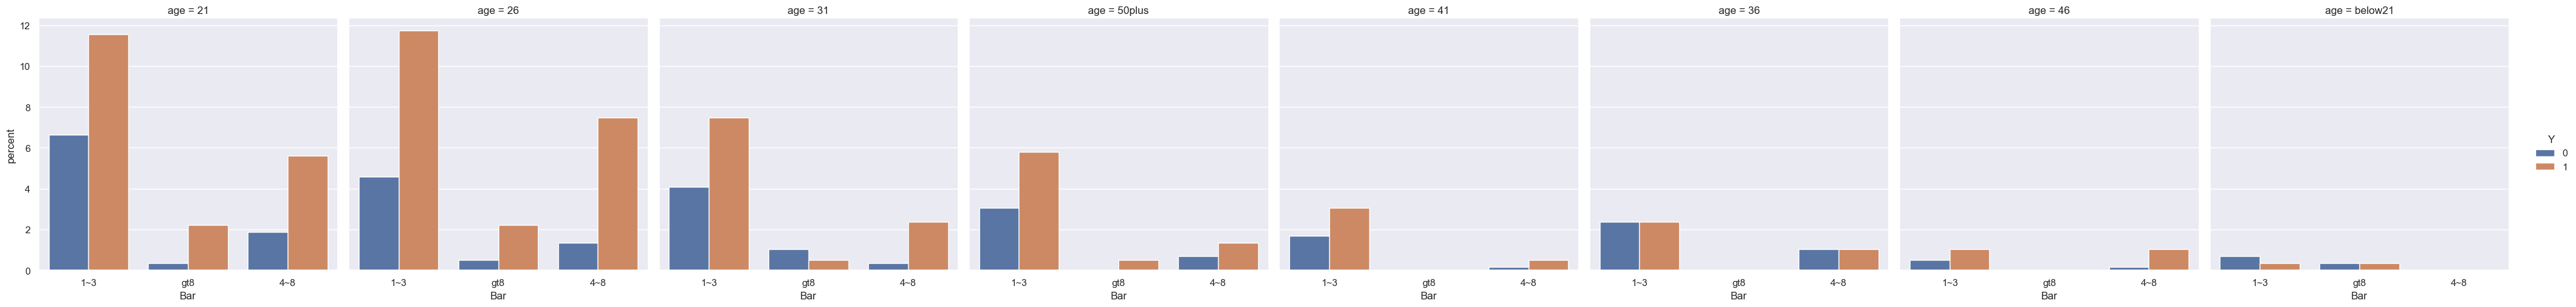

In [26]:
#Generate catplot of individuals who go to bars more than once a month categorized by age group and coupon acceptance
sns.catplot(data=df_went_to_bar_more_than_once_a_month, x="Bar", kind="count", hue='Y', col='age', stat='percent')

We can see the largest acceptance rates for individuals of ages 21 and 26 years, all under 30 years old 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating the Coffee House Coupons**

I will follow a similar approach as the one suggested for Bar coupons and apply that framework to analyzing Coffee House coupons

1. Create a new `DataFrame` that contains just the coffee house coupons.


In [27]:
df_coffee_house = data.query('coupon =="Coffee House"')

2. What proportion of coffee house coupons were accepted?


In [28]:
number_rows = len(df_coffee_house)
number_yes = len(df_coffee_house.query('Y == 1'))
number_no = len(df_coffee_house.query('Y == 0'))
proportion_accepted_percentage = 100*(number_yes/number_rows)
print(f'The proportion of coffee house coupons that were accepted was {proportion_accepted_percentage: 0.2f} percent.')

The proportion of coffee house coupons that were accepted was  50.04 percent.


Interestingly this is significantly higher (20+%) than bar coupons 

3. Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more. 

I will also explore the acceptance rate for those who visited a coffee house more than once a month

In [29]:
df_went_to_ch_3_or_fewer_times = df_coffee_house.query('CoffeeHouse =="never" or CoffeeHouse =="Less1" or CoffeeHouse =="1~3"')
df_went_to_ch_3_or_fewer_times_acceptance_rate_percentage = 100*(len(df_went_to_ch_3_or_fewer_times.query('Y == 1'))/len(df_went_to_ch_3_or_fewer_times))

df_went_to_ch_more_than_3_times = df_coffee_house.query('CoffeeHouse =="4~8" or CoffeeHouse =="gt8"')
df_went_to_ch_more_than_3_times_acceptance_rate_percentage = 100*(len(df_went_to_ch_more_than_3_times.query('Y == 1'))/len(df_went_to_ch_more_than_3_times))

df_went_to_ch_more_than_1_times = df_coffee_house.query('CoffeeHouse !="never" or CoffeeHouse !="Less1"')
df_went_to_ch_more_than_1_times_acceptance_rate_percentage = 100*(len(df_went_to_ch_more_than_1_times.query('Y == 1'))/len(df_went_to_ch_more_than_1_times))

CoffeeHouse_group_attendance_percentage_difference = df_went_to_ch_more_than_3_times_acceptance_rate_percentage - df_went_to_ch_3_or_fewer_times_acceptance_rate_percentage

print(f' The acceptance rate for individuals who went to a Coffee House 3 or fewer times a month was{df_went_to_ch_3_or_fewer_times_acceptance_rate_percentage: 0.2f} percent.\n',
     f'The acceptance rate for individuals who went to a Coffee House more than once a month was{df_went_to_ch_more_than_1_times_acceptance_rate_percentage: 0.2f} percent.\n',
     f'The acceptance rate for individuals who went to a Coffee House more than 3 times a month was{df_went_to_ch_more_than_3_times_acceptance_rate_percentage: 0.2f} percent')

 The acceptance rate for individuals who went to a Coffee House 3 or fewer times a month was 43.12 percent.
 The acceptance rate for individuals who went to a Coffee House more than once a month was 50.04 percent.
 The acceptance rate for individuals who went to a Coffee House more than 3 times a month was 67.50 percent


This result suggests individuals who went to a Coffee House more than 3 times a month are a key group that can serve as a baseline for this analysis. Will explore further below. 

4. Compare the acceptance rate between drivers who go to a Cofee House more than 3 times a month and are below the age of 25 to those 26 and older.
Will also compare additional groups as shown in the code below:

In [30]:
df_went_to_ch_more_than_3_times = df_coffee_house.query('CoffeeHouse =="4~8" or CoffeeHouse =="gt8"')
df_went_to_ch_more_than_3_times_acceptance_rate_percentage = 100*(len(df_went_to_ch_more_than_3_times.query('Y == 1'))/len(df_went_to_ch_more_than_3_times))

df_below25_went_to_ch_more_than_3_times = df_coffee_house.query('(CoffeeHouse =="4~8" or CoffeeHouse =="gt8") and (age == "21" or age == "below21")')
df_below25_went_to_ch_more_than_3_times_acceptance_rate_percentage = 100*(len(df_below25_went_to_ch_more_than_3_times.query('Y == 1'))/len(df_below25_went_to_ch_more_than_3_times))

df_26andover_went_to_ch_more_than_3_times = df_coffee_house.query('(CoffeeHouse =="4~8" or CoffeeHouse =="gt8") and (age != "21" or age != "below21")')
df_26andover_went_to_ch_more_than_3_times_acceptance_rate_percentage = 100*(len(df_26andover_went_to_ch_more_than_3_times.query('Y == 1'))/len(df_26andover_went_to_ch_more_than_3_times))

df_below25and50plus_went_to_ch_more_than_3_times = df_coffee_house.query('(CoffeeHouse =="4~8" or CoffeeHouse =="gt8") and (age == "21" or age == "below21"or age == "50plus")')
df_below25and50plus_went_to_ch_more_than_3_times_acceptance_rate_percentage = 100*(len(df_below25and50plus_went_to_ch_more_than_3_times.query('Y == 1'))/len(df_below25and50plus_went_to_ch_more_than_3_times))

print(f' The acceptance rate for individuals who went to a CoffeeHouse more than 3 times a month was{df_went_to_ch_more_than_3_times_acceptance_rate_percentage: 0.2f} percent.\n',
     f'The acceptance rate for individuals who went to a CoffeeHouse more than 3 times a month and are below the age of 25 was{df_below25_went_to_ch_more_than_3_times_acceptance_rate_percentage: 0.2f} percent.\n',
     f'The acceptance rate for individuals who went to a CoffeeHouse more than 3 times a month and are age 26 and older was{df_26andover_went_to_ch_more_than_3_times_acceptance_rate_percentage: 0.2f} percent.\n',
     f'The acceptance rate for individuals who went to a CoffeeHouse more than 3 times a month and are age below 25 and 50plus was{df_below25and50plus_went_to_ch_more_than_3_times_acceptance_rate_percentage: 0.2f} percent.')


 The acceptance rate for individuals who went to a CoffeeHouse more than 3 times a month was 67.50 percent.
 The acceptance rate for individuals who went to a CoffeeHouse more than 3 times a month and are below the age of 25 was 74.90 percent.
 The acceptance rate for individuals who went to a CoffeeHouse more than 3 times a month and are age 26 and older was 67.50 percent.
 The acceptance rate for individuals who went to a CoffeeHouse more than 3 times a month and are age below 25 and 50plus was 72.71 percent.


The acceptance rate for individuals who went to a CoffeeHouse more than 3 times a month and are below the age of 25 was the highest among these groups. We can visualize this fact with the help of a barplot:

Text(0.5, 1.0, 'Individuals going to Coffee Shops > 3 times/month')

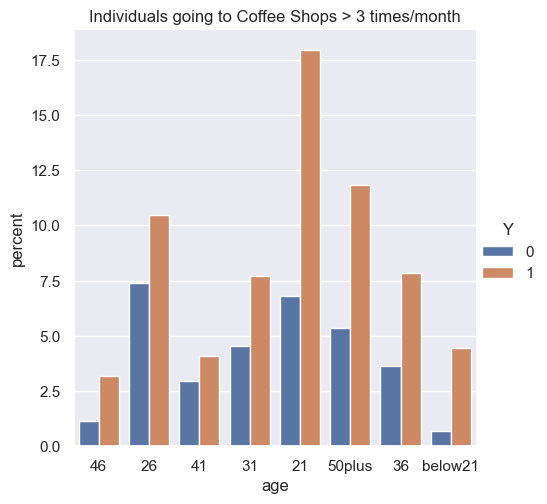

In [31]:
# Count plot in seaborn of grouped by age and coupon acceptance 
sns.catplot(data=df_went_to_ch_more_than_3_times, x="age", kind="count", hue='Y', stat='percent')
# Include descriptive title
plt.title('Individuals going to Coffee Shops > 3 times/month')

Let's explore if gender has a significant influence on coupon acceptance for individuals who went to a CoffeeHouse more than 3 times a month and are below the age of 25. Will use a cat plot for visualization:

 The acceptance rate for individuals who went to a CoffeeHouse more than 3 times a month and are below the age of 25 and male was 73.51 percent.
 The acceptance rate for individuals who went to a CoffeeHouse more than 3 times a month and are below the age of 25 and female was 76.79 percent.


Text(0.5, 1.0, 'Individuals under 25 going to Coffee Shops > 3 times/month')

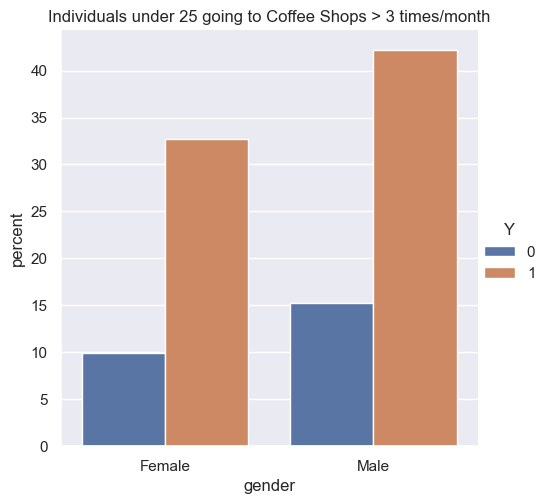

In [32]:
df_below25_male_went_to_ch_more_than_3_times = df_coffee_house.query('(CoffeeHouse =="4~8" or CoffeeHouse =="gt8") and (age == "21" or age == "below21") and gender =="Male"')
df_below25_male_went_to_ch_more_than_3_times_acceptance_rate_percentage = 100*(len(df_below25_male_went_to_ch_more_than_3_times.query('Y == 1'))/len(df_below25_male_went_to_ch_more_than_3_times))

df_below25_female_went_to_ch_more_than_3_times = df_coffee_house.query('(CoffeeHouse =="4~8" or CoffeeHouse =="gt8") and (age == "21" or age == "below21") and gender =="Female"')
df_below25_female_went_to_ch_more_than_3_times_acceptance_rate_percentage = 100*(len(df_below25_female_went_to_ch_more_than_3_times.query('Y == 1'))/len(df_below25_female_went_to_ch_more_than_3_times))

print(f' The acceptance rate for individuals who went to a CoffeeHouse more than 3 times a month and are below the age of 25 and male was{df_below25_male_went_to_ch_more_than_3_times_acceptance_rate_percentage: 0.2f} percent.\n',
     f'The acceptance rate for individuals who went to a CoffeeHouse more than 3 times a month and are below the age of 25 and female was{df_below25_female_went_to_ch_more_than_3_times_acceptance_rate_percentage: 0.2f} percent.')

# Count plot in seaborn 
sns.catplot(data=df_below25_went_to_ch_more_than_3_times, x="gender", kind="count", hue='Y', stat='percent')
# Include descriptive title
plt.title('Individuals under 25 going to Coffee Shops > 3 times/month')



We can see that the acceptance rate for females was higher than for males despite the fact that males had the largest number of coupons accepted

Let's look at the influence of income:

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '$25000 - $37499'),
  Text(1, 0, '$100000 or More'),
  Text(2, 0, '$12500 - $24999'),
  Text(3, 0, '$50000 - $62499'),
  Text(4, 0, 'Less than $12500'),
  Text(5, 0, '$62500 - $74999'),
  Text(6, 0, '$87500 - $99999'),
  Text(7, 0, '$75000 - $87499'),
  Text(8, 0, '$37500 - $49999')])

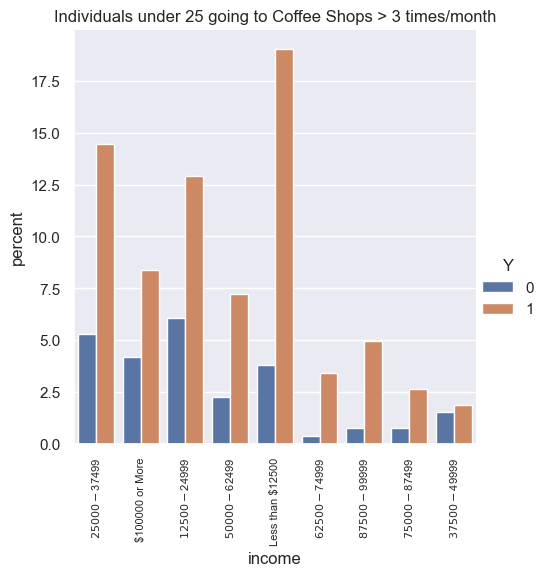

In [33]:
# Count plot in seaborn 
sns.catplot(data=df_below25_went_to_ch_more_than_3_times, x="income", kind="count", hue='Y', stat='percent')
# Include descriptive title
plt.title('Individuals under 25 going to Coffee Shops > 3 times/month')
#Change size and rotate labels as they are long
plt.xticks(fontsize=8, rotation = 90)

In [34]:
print(' Acceptance rates as a function of income level \n','-----------------------------------------------\n')
#Compute acceptance rates as a function of income level
100*df_below25_went_to_ch_more_than_3_times.query('Y==1')[["income"]].value_counts() /(df_below25_went_to_ch_more_than_3_times.query('Y==0')[["income"]].value_counts()+ df_below25_went_to_ch_more_than_3_times.query('Y==1')[["income"]].value_counts()) 

 Acceptance rates as a function of income level 
 -----------------------------------------------



income          
$100000 or More     66.666667
$12500 - $24999     68.000000
$25000 - $37499     73.076923
$37500 - $49999     55.555556
$50000 - $62499     76.000000
$62500 - $74999     90.000000
$75000 - $87499     77.777778
$87500 - $99999     86.666667
Less than $12500    83.333333
Name: count, dtype: float64

We can see the groups with the largest acceptance rates being individuals with incomes less than 12500, between 87500-99999 and between 62500-74999 dollars. The largest number of coupons accepted were by the less than 12500 dollar income group   

Let's look now at the influence of education:

([0, 1, 2, 3],
 [Text(0, 0, 'Some college - no degree'),
  Text(1, 0, 'Bachelors degree'),
  Text(2, 0, 'Graduate degree (Masters or Doctorate)'),
  Text(3, 0, 'High School Graduate')])

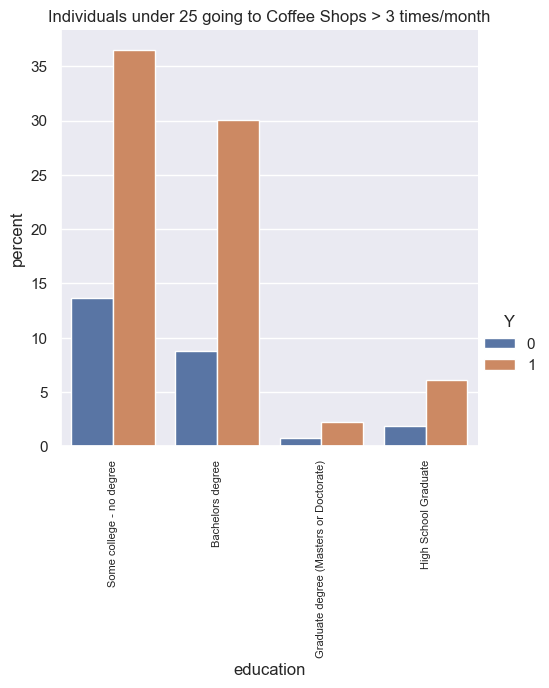

In [35]:
# Count plot in seaborn 
sns.catplot(data=df_below25_went_to_ch_more_than_3_times, x="education", kind="count", hue='Y', stat='percent')
# Include descriptive title
plt.title('Individuals under 25 going to Coffee Shops > 3 times/month')
#Change size and rotate labels as they are long
plt.xticks(fontsize=8, rotation = 90)

In [36]:
print(' Acceptance rates as a function of educational level \n','---------------------------------------------------\n')
#Compute acceptance rates as a function of educational level
100*df_below25_went_to_ch_more_than_3_times.query('Y==1')[["education"]].value_counts() /(df_below25_went_to_ch_more_than_3_times.query('Y==0')[["education"]].value_counts()+ df_below25_went_to_ch_more_than_3_times.query('Y==1')[["education"]].value_counts()) 

 Acceptance rates as a function of educational level 
 ---------------------------------------------------



education                             
Some college - no degree                  72.727273
Bachelors degree                          77.450980
High School Graduate                      76.190476
Graduate degree (Masters or Doctorate)    75.000000
Name: count, dtype: float64

We see individuals with bachelors degree are the ones with the largest coupon acceptance rates followed by individuals with high school diplomas. Overall there wasn't much difference between groups. 

Let's see now if time has an influence on Coffee House coupon acceptance. Let use a bar plot for that purpose:

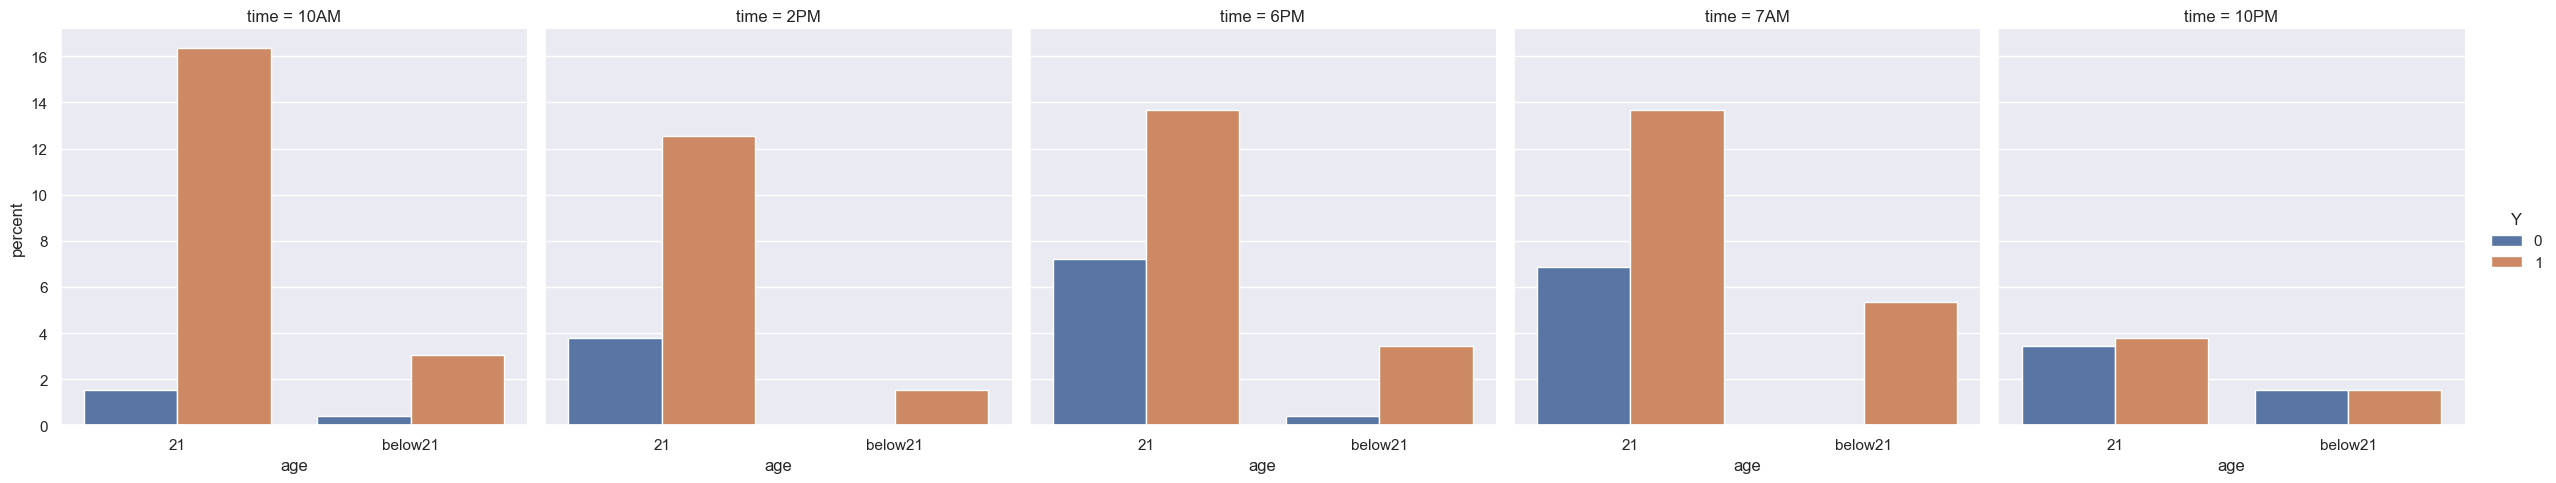

In [37]:
#Count plot in seaborn gruped by age and time of the day coupon is accepted/rejected
sns.catplot(data=df_below25_went_to_ch_more_than_3_times, x="age", kind="count", hue='Y', col='time', stat='percent')

In [38]:
print(' Acceptance rates as a function of time of the day \n','---------------------------------------------------\n')
#Compute acceptance rates as a function of time of the day
100*df_below25_went_to_ch_more_than_3_times.query('Y==1')[["time"]].value_counts() /(df_below25_went_to_ch_more_than_3_times.query('Y==0')[["time"]].value_counts()+ df_below25_went_to_ch_more_than_3_times.query('Y==1')[["time"]].value_counts()) 

 Acceptance rates as a function of time of the day 
 ---------------------------------------------------



time
10AM    91.071429
10PM    51.851852
2PM     78.723404
6PM     69.230769
7AM     73.529412
Name: count, dtype: float64

We can see coupon acceptance rates are low late at night (10 PM) and peaking at 10 AM and 2 PM. The largest number of coupons accepted was in the 21 year old group

Let's now look at the influence of some attributes such as direction and location. First let's look at direction:

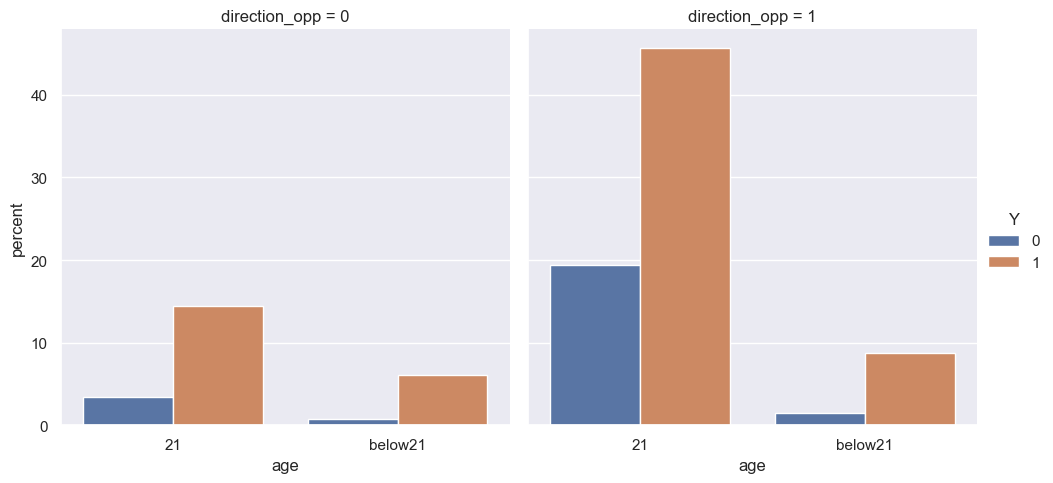

In [39]:
# Count plot in seaborn to look at the influence of opposite direction on coupon acceptance
sns.catplot(data=df_below25_went_to_ch_more_than_3_times, x="age", kind="count", hue='Y', col='direction_opp', stat='percent')

In [40]:
print(' Acceptance rates as a function of opposite direction \n','---------------------------------------------------\n')
#Compute acceptance rates as a function of opposite direction
100*df_below25_went_to_ch_more_than_3_times.query('Y==1')[["direction_opp"]].value_counts() /(df_below25_went_to_ch_more_than_3_times.query('Y==0')[["direction_opp"]].value_counts()+ df_below25_went_to_ch_more_than_3_times.query('Y==1')[["direction_opp"]].value_counts()) 

 Acceptance rates as a function of opposite direction 
 ---------------------------------------------------



direction_opp
1                72.222222
0                83.076923
Name: count, dtype: float64

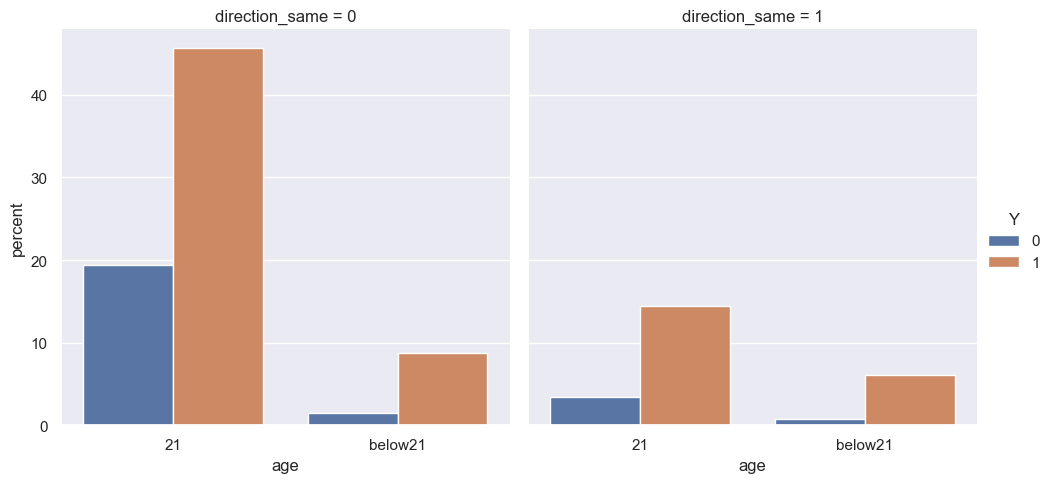

In [41]:
# Count plot in seaborn to look at the influence of same direction on coupon acceptance
sns.catplot(data=df_below25_went_to_ch_more_than_3_times, x="age", kind="count", hue='Y', col='direction_same', stat='percent')

In [42]:
print(' Acceptance rates as a function of same direction \n','---------------------------------------------------\n')
#Compute acceptance rates as a function of time of the day
100*df_below25_went_to_ch_more_than_3_times.query('Y==1')[["direction_same"]].value_counts() /(df_below25_went_to_ch_more_than_3_times.query('Y==0')[["direction_same"]].value_counts()+ df_below25_went_to_ch_more_than_3_times.query('Y==1')[["direction_same"]].value_counts()) 

 Acceptance rates as a function of same direction 
 ---------------------------------------------------



direction_same
0                 72.222222
1                 83.076923
Name: count, dtype: float64

We can see coupon acceptance rates are sginificantly higher when the individuals are driving in the direction of the coffee house

Finally lets look at the proximity factor

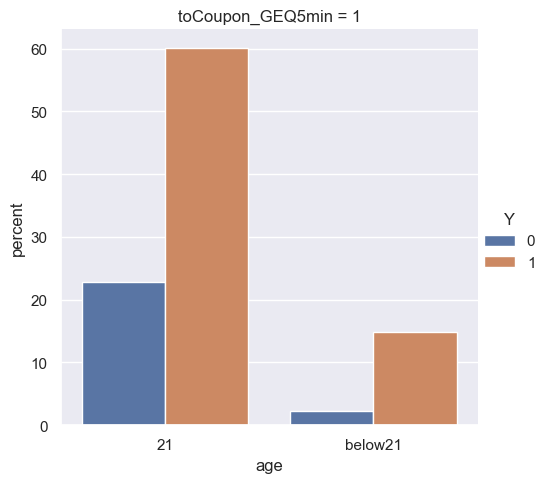

In [43]:
# Count plot in seaborn to look at the influence of proximity on coupon acceptance
sns.catplot(data=df_below25_went_to_ch_more_than_3_times, x="age", kind="count", hue='Y', col='toCoupon_GEQ5min', stat='percent')

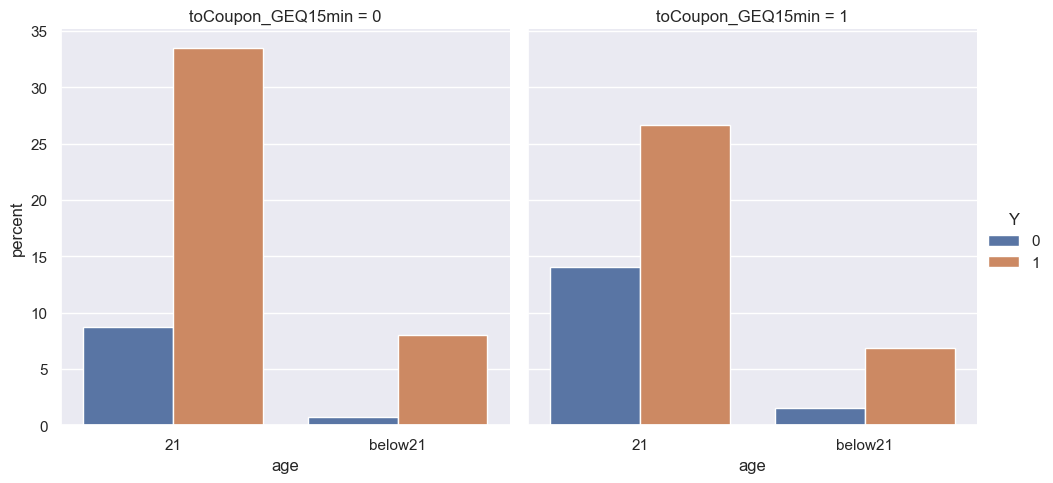

In [44]:
# Count plot in seaborn to look at the influence of proximity on coupon acceptance
sns.catplot(data=df_below25_went_to_ch_more_than_3_times, x="age", kind="count", hue='Y', col='toCoupon_GEQ15min', stat='percent')

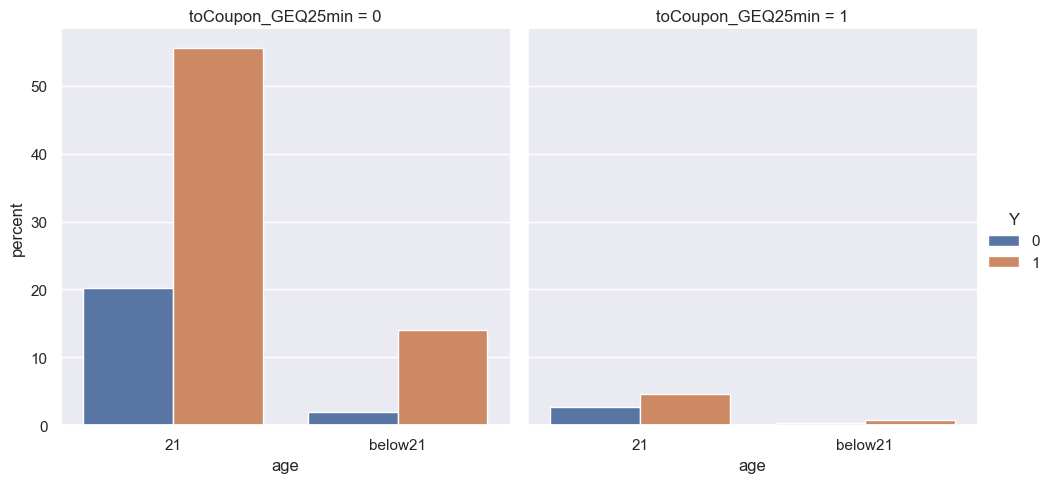

In [45]:
# Count plot in seaborn to look at the influence of proximity on coupon acceptance
sns.catplot(data=df_below25_went_to_ch_more_than_3_times, x="age", kind="count", hue='Y', col='toCoupon_GEQ25min', stat='percent')

In [46]:
print(' Acceptance rates as a function of distance GEQ5min \n','---------------------------------------------------\n')
#Compute acceptance rates as a function of time of the day
100*df_below25_went_to_ch_more_than_3_times.query('Y==1')[["toCoupon_GEQ5min"]].value_counts() /(df_below25_went_to_ch_more_than_3_times.query('Y==0')[["toCoupon_GEQ5min"]].value_counts()+ df_below25_went_to_ch_more_than_3_times.query('Y==1')[["toCoupon_GEQ5min"]].value_counts()) 

 Acceptance rates as a function of distance GEQ5min 
 ---------------------------------------------------



toCoupon_GEQ5min
1                   74.904943
Name: count, dtype: float64

In [47]:
print(' Acceptance rates as a function of distance GEQ15min \n','---------------------------------------------------\n')
#Compute acceptance rates as a function of time of the day
100*df_below25_went_to_ch_more_than_3_times.query('Y==1')[["toCoupon_GEQ15min"]].value_counts() /(df_below25_went_to_ch_more_than_3_times.query('Y==0')[["toCoupon_GEQ15min"]].value_counts()+ df_below25_went_to_ch_more_than_3_times.query('Y==1')[["toCoupon_GEQ15min"]].value_counts())

 Acceptance rates as a function of distance GEQ15min 
 ---------------------------------------------------



toCoupon_GEQ15min
0                    81.343284
1                    68.217054
Name: count, dtype: float64

In [48]:
print(' Acceptance rates as a function of distance GEQ25min  \n','---------------------------------------------------\n')
#Compute acceptance rates as a function of time of the day
100*df_below25_went_to_ch_more_than_3_times.query('Y==1')[["toCoupon_GEQ25min"]].value_counts() /(df_below25_went_to_ch_more_than_3_times.query('Y==0')[["toCoupon_GEQ25min"]].value_counts()+ df_below25_went_to_ch_more_than_3_times.query('Y==1')[["toCoupon_GEQ25min"]].value_counts()) 

 Acceptance rates as a function of distance GEQ25min  
 ---------------------------------------------------



toCoupon_GEQ25min
0                    75.933610
1                    63.636364
Name: count, dtype: float64

Not suprisingly coupons acceptance rates are higher when the coffee house is closer to the driver. Acceptance rate peaks when the driver is within 15 minutes of the store at the time the coupon is received

Coffee House analysis summary
 ==============================
Based on the partial analyses performed, the customer who is the most likely to accept coffee house coupons has the following profile:

        - Visits coffee houses more than 3 times a month
        - It is under 25 years old
        - Female
        - Has an income less than $12500
        - The coupon is issued between the mid morning and the early afternoon (10AM to 2PM)
        - It is driving in the same direction as the coffee house is located
        - It is within 15 minutes of the store   

 NEXT STEPS AND RECOMMENDATIONS
 ==============================
  We have completed an initial analysis of two coupon types with a limited set of variables and data attributes.
  It would be good to expand the analysis to explore the possible influences of occupation, passanger type, marital status, family composition and weather among others.
  Also expand the analysis to look at other type of store coupons as well. 